In [67]:
import pandas as pd 
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse.linalg import svds
from scipy import sparse
import seaborn as sns

In [49]:
filepath = './yelp.edgelist'
data = pd.read_csv(filepath, sep=' ',header = None,names = ["用户id","饭店id","权重"]) # 制表符分隔tab  
data

,用户id,饭店id,权重
0,0,0,1
1,0,198,1
2,0,11036,1
3,0,40573,1
4,0,81,1
...,...,...,...
2601672,686551,85538,1
2601673,686552,85538,1
2601674,686553,85538,1
2601675,686554,85538,1


In [8]:
G = nx.DiGraph()
G.add_weighted_edges_from([tuple(x) for x in data.values])

In [21]:
# G2=nx.betweenness_centrality(G,k=2)
# nx.draw_networkx(G2)
# plt.show()
print (G.number_of_edges())

2601677


In [69]:
#
yelp = np.array(data)
yelp_row = yelp[:,0] # 行索引
yelp_col = yelp[:,1] # 列索引
yelp_data= yelp[:,2] # 索引对应的数值
yelp_matrix = sparse.coo_matrix((yelp_data, (yelp_row, yelp_col)), dtype=float) # 需要转化为f
print(yelp_matrix.shape)
print(type(yelp_matrix))
u, s, vt = svds(yelp_matrix,k=10,which = 'LM')

(686556, 85539)
<class 'scipy.sparse.coo.coo_matrix'>


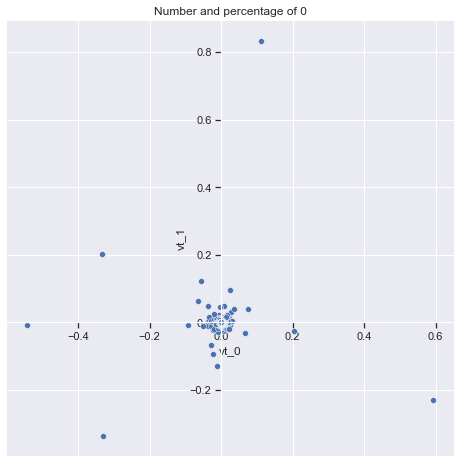

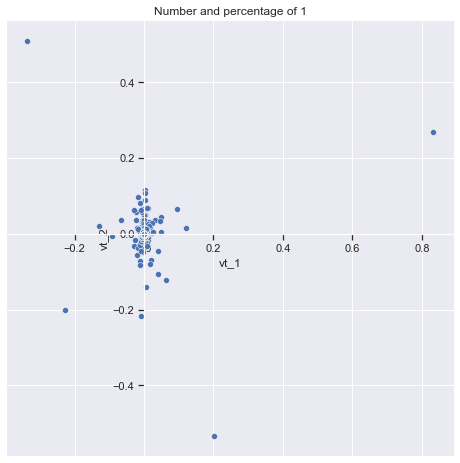

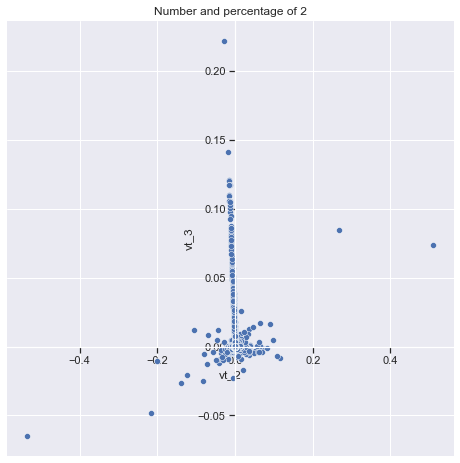

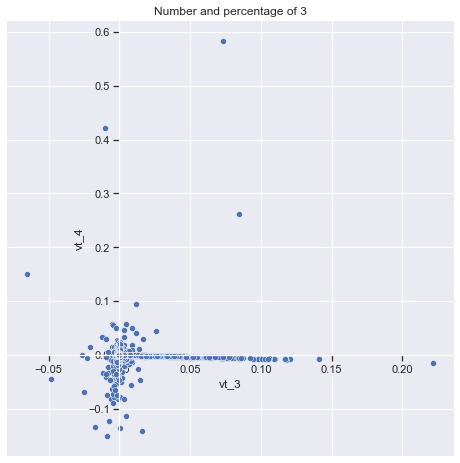

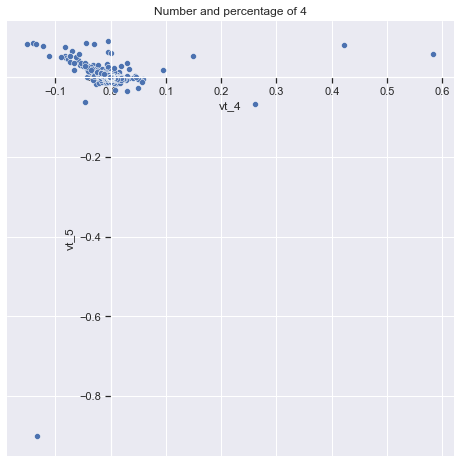

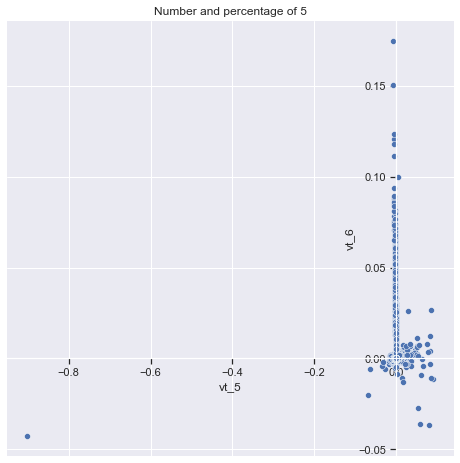

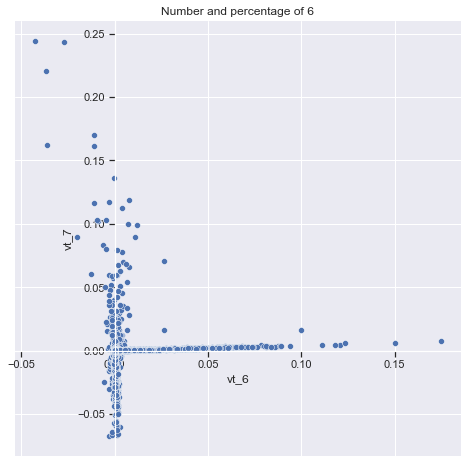

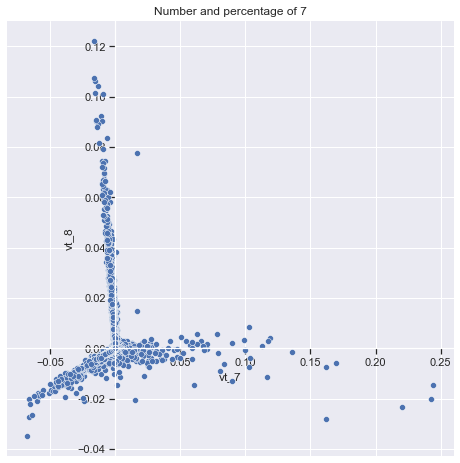

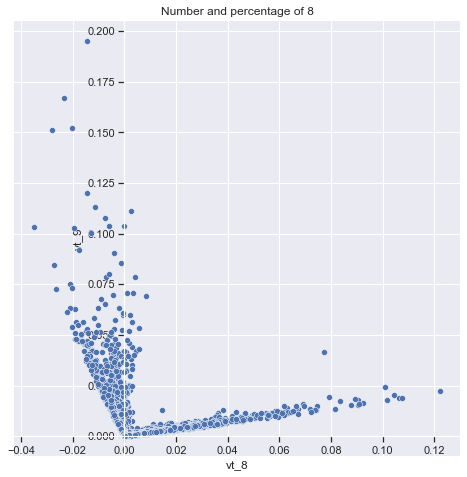

In [100]:
# Spectral Subspace Plots
sns.set(style="darkgrid") 
for i in range(len(vt)-1):
    fig = plt.figure(figsize=(8, 8))
    ax = plt.axes()
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    ax.spines['bottom'].set_position(('data', 0))
    ax.yaxis.set_ticks_position('left')
    ax.spines['left'].set_position(('data', 0))

    
    g = sns.scatterplot( x="vt_{}".format(i), y="vt_{}".format(i+1),data=pd.DataFrame({
        "vt_{}".format(i):vt[i],
        "vt_{}".format(i+1):vt[i+1]
    }),palette="Set2")
    g.set_title("Number and percentage of {}".format(i))

    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.2f}%'.format(100*height/len(vt)),
                ha="center") 
    plt.show()

In [70]:
len(vt)

10